# Caco-2 permeability Exploratory Data Analysis

## 1. Problem 🧐

Identify compound's property.

Data:
* CSV (IC50 values, MACCS keys, Klekota-Roth and PubChem substructure fingerprints)
* SDF (series of molfiles)

MACCS keys:
* List of 166 (keys) binary values (0 or 1) which characterize a molecule.
Details: https://github.com/rdkit/rdkit-orig/blob/master/rdkit/Chem/MACCSkeys.py

Klekota-Roth fingerprints:
* Set of 4860 chemical substructures (binary values).
Details: 

PubChem fingerprints:
* 881 binary bits (indicate the presence or absence of a certain group of chemical features in a compound).
Details: https://web.cse.ohio-state.edu/~zhang.10631/bak/drugreposition/list_fingerprints.pdf



### 1.1 Libraries 📖

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolToSmiles

pd.set_option('display.max_columns', None)

colors_palette = ['#ffa600','#ff6361','#bc5090','#58508d', '#65345a']

### 1.2 Functions

In [2]:
def annotate(ax, fontsize=12):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ','), 
               (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 6), textcoords = 'offset points', fontsize=fontsize)

## 2. Fingerprints

### 2.1 Data Analyse and Preprocessing 📊

In [3]:
df_caco = pd.read_csv("../data/raw/caco2_permeability_MACCSFP.csv" )
print("Examples: {0}, columns: {1}".format(df_caco.shape[0],df_caco.shape[1]))
df_caco.head()

Examples: 1241, columns: 167


permeability  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0           4.0         0         0         0         0         0         0   
1         200.0         0         0         0         0         0         0   
2           2.1         0         0         0         0         0         0   
3           2.6         0         0         0         0         0         0   
4           0.5         0         0         0         0         0         0   

   MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  MACCSFP13  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

   MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  MACCSFP19  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          1          0          0          0   
4          0          0          1          0          0          0   

   MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  MACCSFP25  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          1          0          1   
3          0          0          1          1          0          0   
4          0          0          1          0          0          0   

   MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  MACCSFP31  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP32  MACCSFP33  MACCSFP34  MACCSFP35  MACCSFP36  MACCSFP37  \
0          0          0          0          0          0          0   
1          0          0          0          0          1          0   
2          0          0          0          0          0          0   
3          1          1          0          0          0          0   
4          1          1          0          0          0          0   

   MACCSFP38  MACCSFP39  MACCSFP40  MACCSFP41  MACCSFP42  MACCSFP43  \
0          0          0          0          0          0          0   
1          1          0          0          0          1          0   
2          1          0          0          0          1          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   MACCSFP44  MACCSFP45  MACCSFP46  MACCSFP47  MACCSFP48  MACCSFP49  \
0          0          0          0          0          0          0   
1          0          0          0          1          0          0   
2          0          0          0          0          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   MACCSFP50  MACCSFP51  MACCSFP52  MACCSFP53  MACCSFP54  MACCSFP55  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          1          0          0   
3          0          1          0          0          0          1   
4          0          1          0          0          0          1   

   MACCSFP56  MACCSFP57  MACCSFP58  MACCSFP59  MACCSFP60  MACCSF

In [4]:
df_caco_papp = pd.read_csv("../data/raw/caco2_permeability_papp_MACCSFP.csv" )
print("Examples: {0}, columns: {1}".format(df_caco_papp.shape[0],df_caco_papp.shape[1]))
df_caco_papp.head()

Examples: 2400, columns: 167


permetability_papp  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  \
0              240.00         0         0         0         0         0   
1                0.58         0         0         0         0         0   
2                2.00         0         0         0         0         0   
3               31.00         0         0         0         0         0   
4               34.00         0         0         0         0         0   

   MACCSFP6  MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  \
0         0         0         0         0          0          0          0   
1         0         0         0         0          0          0          0   
2         0         0         0         0          0          0          0   
3         0         0         0         0          0          0          0   
4         0         0         0         0          0          0          0   

   MACCSFP13  MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   MACCSFP19  MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   MACCSFP25  MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP31  MACCSFP32  MACCSFP33  MACCSFP34  MACCSFP35  MACCSFP36  \
0          0          0          0          1          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          1          1          0          0          0   
4          0          1          1          0          0          0   

   MACCSFP37  MACCSFP38  MACCSFP39  MACCSFP40  MACCSFP41  MACCSFP42  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          1   
3          0          0          0          0          0          1   
4          0          0          0          0          0          1   

   MACCSFP43  MACCSFP44  MACCSFP45  MACCSFP46  MACCSFP47  MACCSFP48  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP49  MACCSFP50  MACCSFP51  MACCSFP52  MACCSFP53  MACCSFP54  \
0          0          0          0          0          0          1   
1          0          0          0          0          0          1   
2          0          0          0          0          0          1   
3          0          0          1          0          0          1   
4          0          0          1          0          0          1   

   MACCSFP55  MACCSFP56  MACCSFP57  MACCSFP58  MACCSFP59  MACCSFP60  \
0          0          0

In [5]:
df_caco_pubch = pd.read_csv("../data/raw/caco2_permeability_PubchemFP.csv")
print("Examples: {0}, columns: {1}".format(df_caco_pubch.shape[0],df_caco_pubch.shape[1]))
df_caco_pubch.head()

Examples: 1241, columns: 882


permeability  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0           4.0           1           1           1           1           0   
1         200.0           1           1           0           0           0   
2           2.1           1           1           1           0           0   
3           2.6           1           1           1           1           0   
4           0.5           1           1           1           1           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0           0           0           0           0           1            1   
1           0           0           0           0           1            1   
2           0           0           0           0           1            1   
3           0           0           0           0           1            1   
4           0           0           0           0           1            1   

   PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0            1            1            0            1            1   
1            1            0            0            1            1   
2            1            1            0            1            1   
3            1            1            0            1            1   
4            1            1            1            1            1   

   PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0            0            0            1            1            0   
1            1            0            0            0            0   
2            1            0            1            1            1   
3            1            0            1            1            1   
4            1            0            1            1            0   

   PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0            0            0            0            0            0   
1            0            0            1            1            0   
2            0            0            1            1            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP26  PubchemFP27  PubchemFP28  PubchemFP29  PubchemFP30  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP31  PubchemFP32  PubchemFP33  PubchemFP34  PubchemFP35  \
0            0            0            0            0            0   
1            0            0            1            0            0   
2            0            0            0            0            0   
3            0            0            1            0            0   
4            0            0            1            0            0   

   PubchemFP36  PubchemFP37  PubchemFP38  PubchemFP39  PubchemFP40  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP41  PubchemFP42  PubchemFP43  PubchemFP44  PubchemFP45  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP46  PubchemFP47  PubchemFP48  PubchemFP49  PubchemFP50  \
0            0            0            0  

In [6]:
df_caco_papp_pubch = pd.read_csv("../data/raw/caco2_permeability_papp_PubchemFP.csv")
print("Examples: {0}, columns: {1}".format(df_caco_papp_pubch.shape[0],df_caco_papp_pubch.shape[1]))
df_caco_papp_pubch.head()

Examples: 2400, columns: 882


permetability_papp  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0              240.00           1           1           1           0   
1                0.58           1           1           1           1   
2                2.00           1           1           1           1   
3               31.00           1           1           1           1   
4               34.00           1           1           1           0   

   PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0           0           0           0           0           0           1   
1           0           0           0           0           0           1   
2           0           0           0           0           0           1   
3           0           0           0           0           0           1   
4           0           0           0           0           0           1   

   PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0            1            1            0            0            1   
1            1            1            1            0            1   
2            1            1            1            0            1   
3            1            1            1            0            1   
4            1            1            1            0            1   

   PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0            0            0            0            1            1   
1            1            1            0            1            1   
2            1            1            0            1            1   
3            1            1            0            1            1   
4            1            1            0            1            1   

   PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0            0            0            0            0            0   
1            1            0            0            0            0   
2            0            0            0            1            0   
3            1            0            0            1            1   
4            1            0            0            1            1   

   PubchemFP25  PubchemFP26  PubchemFP27  PubchemFP28  PubchemFP29  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            1            0            0            0            0   

   PubchemFP30  PubchemFP31  PubchemFP32  PubchemFP33  PubchemFP34  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            1            0   

   PubchemFP35  PubchemFP36  PubchemFP37  PubchemFP38  PubchemFP39  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP40  PubchemFP41  PubchemFP42  PubchemFP43  PubchemFP44  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP45  PubchemFP46  PubchemFP47  PubchemFP48  PubchemFP49  \
0            0            0            0            0            0   
1            0

In [7]:
df_caco_klek = pd.read_csv("../data/raw/caco2_permeability_KlekFP.csv")
print("Examples: {0}, columns: {1}".format(df_caco_klek.shape[0],df_caco_klek.shape[1]))
df_caco_klek.head()

Examples: 1241, columns: 4861


permeability  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  \
0           4.0      1      1      0      0      0      0      0      0   
1         200.0      1      0      0      0      0      0      0      0   
2           2.1      0      0      0      0      0      0      0      0   
3           2.6      1      0      0      0      0      0      0      0   
4           0.5      1      0      0      0      0      0      0      0   

   KRFP9  KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  KRFP17  \
0      0       0       0       0       0       0       0       1       0   
1      0       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      0       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   KRFP18  KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  KRFP26  \
0       0       0       1       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP27  KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  KRFP35  \
0       0       0       0       0       0       0       1       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP36  KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  KRFP44  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP45  KRFP46  KRFP47  KRFP48  KRFP49  KRFP50  KRFP51  KRFP52  KRFP53  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP54  KRFP55  KRFP56  KRFP57  KRFP58  KRFP59  KRFP60  KRFP61  KRFP62  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP63  KRFP64  KRFP65  KRFP66  KRFP67  KRFP68  KRFP69  KRFP70  KRFP71  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP72  KRFP73  KRFP74  KRFP75  KRFP76  KRFP77  KRFP78  KRFP79  KRFP80  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0

In [8]:
df_caco_papp_klek = pd.read_csv("../data/raw/caco2_permeability_papp_KlekFP.csv")
print("Examples: {0}, columns: {1}".format(df_caco_papp_klek.shape[0],df_caco_papp_klek.shape[1]))
df_caco_papp_klek.head()

Examples: 2400, columns: 4861


permetability_papp  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  \
0              240.00      1      0      0      0      0      0      0      0   
1                0.58      1      0      0      0      0      0      0      0   
2                2.00      1      1      0      0      0      0      0      0   
3               31.00      1      1      0      0      0      0      0      0   
4               34.00      1      1      0      0      0      0      0      0   

   KRFP9  KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  KRFP17  \
0      0       0       0       0       0       1       0       0       1   
1      0       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       1       0       1       0   
3      0       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   KRFP18  KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  KRFP26  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       1       0       0       0       0       0       0   
2       0       0       1       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP27  KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  KRFP35  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP36  KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  KRFP44  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP45  KRFP46  KRFP47  KRFP48  KRFP49  KRFP50  KRFP51  KRFP52  KRFP53  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP54  KRFP55  KRFP56  KRFP57  KRFP58  KRFP59  KRFP60  KRFP61  KRFP62  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP63  KRFP64  KRFP65  KRFP66  KRFP67  KRFP68  KRFP69  KRFP70  KRFP71  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       1       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP72  KRFP73  KRFP74  KRFP75  KRFP76  KRFP77  KRFP78  KRFP79  KRFP80  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0 

In [9]:
df_caco_papp.rename({'permetability_papp': 'permeability'}, axis=1, inplace=True)
df_caco_papp_pubch.rename({'permetability_papp': 'permeability'}, axis=1, inplace=True)
df_caco_papp_klek.rename({'permetability_papp': 'permeability'}, axis=1, inplace=True)
print(df_caco_papp.columns[0])
print(df_caco_papp_pubch.columns[0])
print(df_caco_papp_klek.columns[0])

permeability
permeability
permeability


In [10]:
df_caco_all = pd.concat([df_caco, df_caco_papp], ignore_index=True)
print("Examples: {0}, columns: {1}".format(df_caco_all.shape[0],df_caco_all.shape[1]))
df_caco_all.head()

Examples: 3641, columns: 167


permeability  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0           4.0         0         0         0         0         0         0   
1         200.0         0         0         0         0         0         0   
2           2.1         0         0         0         0         0         0   
3           2.6         0         0         0         0         0         0   
4           0.5         0         0         0         0         0         0   

   MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  MACCSFP13  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

   MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  MACCSFP19  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          1          0          0          0   
4          0          0          1          0          0          0   

   MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  MACCSFP25  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          1          0          1   
3          0          0          1          1          0          0   
4          0          0          1          0          0          0   

   MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  MACCSFP31  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP32  MACCSFP33  MACCSFP34  MACCSFP35  MACCSFP36  MACCSFP37  \
0          0          0          0          0          0          0   
1          0          0          0          0          1          0   
2          0          0          0          0          0          0   
3          1          1          0          0          0          0   
4          1          1          0          0          0          0   

   MACCSFP38  MACCSFP39  MACCSFP40  MACCSFP41  MACCSFP42  MACCSFP43  \
0          0          0          0          0          0          0   
1          1          0          0          0          1          0   
2          1          0          0          0          1          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   MACCSFP44  MACCSFP45  MACCSFP46  MACCSFP47  MACCSFP48  MACCSFP49  \
0          0          0          0          0          0          0   
1          0          0          0          1          0          0   
2          0          0          0          0          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   MACCSFP50  MACCSFP51  MACCSFP52  MACCSFP53  MACCSFP54  MACCSFP55  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          1          0          0   
3          0          1          0          0          0          1   
4          0          1          0          0          0          1   

   MACCSFP56  MACCSFP57  MACCSFP58  MACCSFP59  MACCSFP60  MACCSF

In [11]:
df_caco_pubch_all = pd.concat([df_caco_pubch, df_caco_papp_pubch], ignore_index=True)
print("Examples: {0}, columns: {1}".format(df_caco_pubch_all.shape[0],df_caco_pubch_all.shape[1]))
df_caco_pubch_all.head()

Examples: 3641, columns: 882


permeability  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0           4.0           1           1           1           1           0   
1         200.0           1           1           0           0           0   
2           2.1           1           1           1           0           0   
3           2.6           1           1           1           1           0   
4           0.5           1           1           1           1           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0           0           0           0           0           1            1   
1           0           0           0           0           1            1   
2           0           0           0           0           1            1   
3           0           0           0           0           1            1   
4           0           0           0           0           1            1   

   PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0            1            1            0            1            1   
1            1            0            0            1            1   
2            1            1            0            1            1   
3            1            1            0            1            1   
4            1            1            1            1            1   

   PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0            0            0            1            1            0   
1            1            0            0            0            0   
2            1            0            1            1            1   
3            1            0            1            1            1   
4            1            0            1            1            0   

   PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0            0            0            0            0            0   
1            0            0            1            1            0   
2            0            0            1            1            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP26  PubchemFP27  PubchemFP28  PubchemFP29  PubchemFP30  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP31  PubchemFP32  PubchemFP33  PubchemFP34  PubchemFP35  \
0            0            0            0            0            0   
1            0            0            1            0            0   
2            0            0            0            0            0   
3            0            0            1            0            0   
4            0            0            1            0            0   

   PubchemFP36  PubchemFP37  PubchemFP38  PubchemFP39  PubchemFP40  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP41  PubchemFP42  PubchemFP43  PubchemFP44  PubchemFP45  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP46  PubchemFP47  PubchemFP48  PubchemFP49  PubchemFP50  \
0            0            0            0  

In [12]:
df_caco_klek_all = pd.concat([df_caco_klek, df_caco_papp_klek], ignore_index=True)
print("Examples: {0}, columns: {1}".format(df_caco_klek_all.shape[0],df_caco_klek_all.shape[1]))
df_caco_klek_all.head()

Examples: 3641, columns: 4861


permeability  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  \
0           4.0      1      1      0      0      0      0      0      0   
1         200.0      1      0      0      0      0      0      0      0   
2           2.1      0      0      0      0      0      0      0      0   
3           2.6      1      0      0      0      0      0      0      0   
4           0.5      1      0      0      0      0      0      0      0   

   KRFP9  KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  KRFP17  \
0      0       0       0       0       0       0       0       1       0   
1      0       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      0       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   KRFP18  KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  KRFP26  \
0       0       0       1       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP27  KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  KRFP35  \
0       0       0       0       0       0       0       1       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP36  KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  KRFP44  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP45  KRFP46  KRFP47  KRFP48  KRFP49  KRFP50  KRFP51  KRFP52  KRFP53  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP54  KRFP55  KRFP56  KRFP57  KRFP58  KRFP59  KRFP60  KRFP61  KRFP62  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP63  KRFP64  KRFP65  KRFP66  KRFP67  KRFP68  KRFP69  KRFP70  KRFP71  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP72  KRFP73  KRFP74  KRFP75  KRFP76  KRFP77  KRFP78  KRFP79  KRFP80  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0

### 2.1.1 Missing/Invalid values 🔎

In [13]:
# count missing values
print("Missing values: {0}".format(df_caco_all.isnull().sum().sum()))
print("Missing values: {0}".format(df_caco_pubch_all.isnull().sum().sum()))
print("Missing values: {0}".format(df_caco_klek_all.isnull().sum().sum()))

Missing values: 0
Missing values: 0
Missing values: 0


In [14]:
df_caco2 = df_caco_all.apply(pd.to_numeric, errors='coerce')

In [15]:
print("Invalid values: {0}".format(df_caco2.isnull().sum().sum()))

Invalid values: 0


### 2.1.2 Duplicated values 

In [16]:
to_drop_caco = df_caco2[df_caco2.duplicated()].index.tolist()
df_caco2 = df_caco2.drop_duplicates()
print(len(to_drop_caco))
print("Examples: {0}, columns: {1}".format(df_caco2.shape[0],df_caco2.shape[1]))
df_caco2.head()

115
Examples: 3526, columns: 167


permeability  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0           4.0         0         0         0         0         0         0   
1         200.0         0         0         0         0         0         0   
2           2.1         0         0         0         0         0         0   
3           2.6         0         0         0         0         0         0   
4           0.5         0         0         0         0         0         0   

   MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  MACCSFP13  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

   MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  MACCSFP19  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          1          0          0          0   
4          0          0          1          0          0          0   

   MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  MACCSFP25  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          1          0          1   
3          0          0          1          1          0          0   
4          0          0          1          0          0          0   

   MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  MACCSFP31  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP32  MACCSFP33  MACCSFP34  MACCSFP35  MACCSFP36  MACCSFP37  \
0          0          0          0          0          0          0   
1          0          0          0          0          1          0   
2          0          0          0          0          0          0   
3          1          1          0          0          0          0   
4          1          1          0          0          0          0   

   MACCSFP38  MACCSFP39  MACCSFP40  MACCSFP41  MACCSFP42  MACCSFP43  \
0          0          0          0          0          0          0   
1          1          0          0          0          1          0   
2          1          0          0          0          1          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   MACCSFP44  MACCSFP45  MACCSFP46  MACCSFP47  MACCSFP48  MACCSFP49  \
0          0          0          0          0          0          0   
1          0          0          0          1          0          0   
2          0          0          0          0          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   MACCSFP50  MACCSFP51  MACCSFP52  MACCSFP53  MACCSFP54  MACCSFP55  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          1          0          0   
3          0          1          0          0          0          1   
4          0          1          0          0          0          1   

   MACCSFP56  MACCSFP57  MACCSFP58  MACCSFP59  MACCSFP60  MACCSF

### 2.1.3 Class balance/Outliers

In [17]:
df_caco2['permeability'].describe()

count    3526.000000
mean       17.392024
std        45.606665
min         0.000000
25%         1.125000
50%         6.400000
75%        18.975000
max       854.000000
Name: permeability, dtype: float64

In [34]:
active = df_caco2[df_caco2['permeability']>10].count()[0]
inactive = df_caco2[df_caco2['permeability']<=10].count()[0]

all_caco = df_caco2['permeability'].count()
print('For 10: {0} Active compounds and {1} inactive compounds'.format(active, inactive))
print('For 10: {:.2%} active compounds and {:.2%} inactive compounds'.format(active/all_caco, inactive/all_caco))

For 10: 1343 Active compounds and 2172 inactive compounds
For 10: 38.21% active compounds and 61.79% inactive compounds


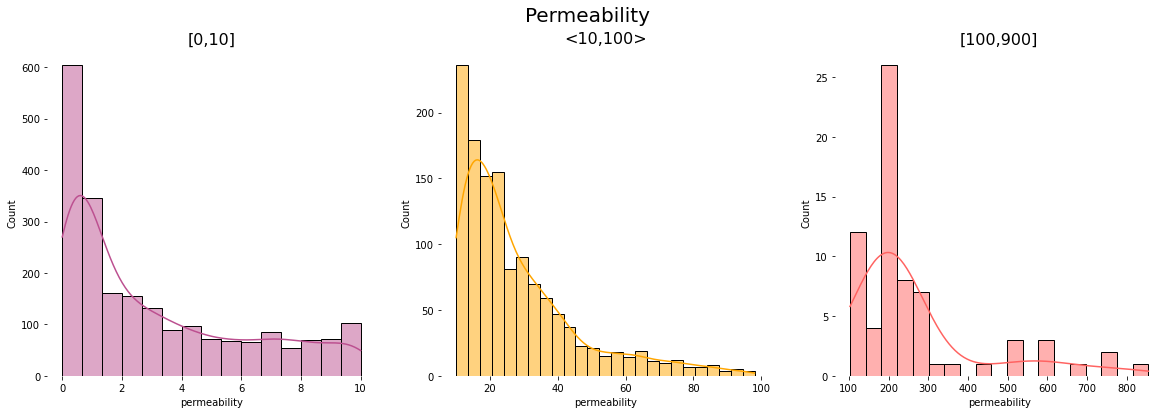

In [29]:
caco_1 = df_caco2[df_caco2['permeability']<=10]
caco_2 = df_caco2[df_caco2['permeability'].between(10, 100, inclusive=False)]
caco_3 = df_caco2[df_caco2['permeability'].between(100,900, inclusive=True)]

fig, axes = plt.subplots(1, 3, figsize = (20, 6))
fig.suptitle('Permeability', fontsize=20)
left = sns.histplot(data=caco_1, x='permeability', ax = axes[0], kde=True, color=colors_palette[2])
center = sns.histplot(data=caco_2, x='permeability', ax = axes[1], kde=True, color=colors_palette[0])
right = sns.histplot(data=caco_3, x='permeability', ax = axes[2], kde=True, color=colors_palette[1])
axes[0].set_title('[0,10]', fontsize=16)
axes[1].set_title('<10,100>', fontsize=16)
axes[2].set_title('[100,900]', fontsize=16)

sns.despine(left=True, bottom=True)

In [30]:
df_scaled = StandardScaler().fit_transform(df_caco['permeability'][:,np.newaxis]);
low_range = df_scaled[df_scaled[:,0].argsort()][:10]
high_range= df_scaled[df_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.37957043]
 [-0.37957043]
 [-0.37957043]
 [-0.37957043]
 [-0.37957043]
 [-0.37957043]
 [-0.37957043]
 [-0.37957043]
 [-0.37957043]
 [-0.37957043]]

outer range (high) of the distribution:
[[ 4.39209046]
 [ 5.39749059]
 [ 6.64227169]
 [ 7.98280518]
 [ 9.17971009]
 [ 9.21162755]
 [ 9.32333868]
 [10.24894514]
 [11.39797385]
 [13.24918677]]


/home/ewelina/miniconda3/envs/admet/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [31]:
df_caco2[df_caco2['permeability']>400]

permeability  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  \
58           440.0         0         0         0         0         0   
325          524.0         0         0         0         0         0   
344          854.0         0         0         0         0         0   
547          608.0         0         0         0         0         0   
801          599.0         0         0         0         0         0   
864          666.0         0         0         0         0         0   
1031         601.0         0         0         0         0         0   
1033         738.0         0         0         0         0         0   
1316         764.0         0         0         0         0         0   
2656         499.0         0         0         0         0         0   
2657         526.0         0         0         0         0         0   

      MACCSFP6  MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  \
58           0         0         0         0          0          0          0   
325          0         0         0         0          0          0          0   
344          0         0         0         0          0          0          0   
547          0         0         0         0          0          0          0   
801          0         0         0         0          0          0          0   
864          0         0         0         0          0          0          0   
1031         0         0         0         0          0          0          0   
1033         0         0         0         0          0          0          0   
1316         0         0         0         0          0          0          0   
2656         0         0         0         0          0          0          0   
2657         0         0         0         0          0          0          0   

      MACCSFP13  MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  \
58            0          0          0          0          0          0   
325           0          0          0          0          0          0   
344           0          0          0          0          0          0   
547           0          0          0          0          0          0   
801           0          0          0          0          0          0   
864           0          0          0          0          0          0   
1031          0          0          0          0          0          0   
1033          0          0          0          0          0          0   
1316          0          0          0          0          0          0   
2656          0          0          0          0          0          0   
2657          0          0          0          0          0          0   

      MACCSFP19  MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  \
58            0          0          0          1          0          0   
325           0          0          0          1          0          0   
344           0          0          0          1          0          0   
547           0          0          0          1          0          0   
801           0          0          0          1          0          0   
864           0          0          0          1          0          0   
1031          0          0          0          1          0          0   
1033          0          0          0          1          0          0   
1316          0          0          0          1          0          0   
2656          0          0          0          1          0          0   
2657          0          0          0          1          0          0   

      MACCSFP25  MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  \
58            0          0          0          0          0          0   
325           0          1          0          0          0          0   
344           0          1          0          0          0          0   
547           0          0          0          0          0          0   
801           0     

In [32]:
# drop outliers
to_drop_caco.extend(df_caco2[df_caco2['permeability']>400].index)
print(len(to_drop_caco))
df_caco2 = df_caco2[df_caco2['permeability']<=400]
df_caco2

126


permeability  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  \
0             4.00         0         0         0         0         0   
1           200.00         0         0         0         0         0   
2             2.10         0         0         0         0         0   
3             2.60         0         0         0         0         0   
4             0.50         0         0         0         0         0   
...            ...       ...       ...       ...       ...       ...   
3636          0.13         0         0         0         0         0   
3637          0.11         0         0         0         0         0   
3638          0.53         0         0         0         0         0   
3639          0.07         0         0         0         0         0   
3640          0.01         0         0         0         0         0   

      MACCSFP6  MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  \
0            0         0         0         0          0          0          0   
1            0         0         0         0          0          0          0   
2            0         0         0         0          0          0          0   
3            0         0         0         0          0          0          0   
4            0         0         0         0          0          0          0   
...        ...       ...       ...       ...        ...        ...        ...   
3636         0         0         0         0          0          0          0   
3637         0         0         0         0          0          0          0   
3638         0         0         1         0          0          1          0   
3639         0         0         0         0          0          0          0   
3640         0         0         0         0          0          0          0   

      MACCSFP13  MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          1          0          0   
4             0          0          0          1          0          0   
...         ...        ...        ...        ...        ...        ...   
3636          0          0          0          1          0          0   
3637          0          0          0          1          0          0   
3638          0          0          0          1          0          0   
3639          0          0          0          1          0          0   
3640          0          0          0          1          0          0   

      MACCSFP19  MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  \
0             0          0          0          1          0          0   
1             0          0          0          1          0          0   
2             0          0          0          1          1          0   
3             0          0          0          1          1          0   
4             0          0          0          1          0          0   
...         ...        ...        ...        ...        ...        ...   
3636          0          0          0          1          0          0   
3637          0          0          0          1          0          0   
3638          0          0          0          1          0          0   
3639          0          0          0          1          0          0   
3640          0          0          0          1          0          0   

      MACCSFP25  MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             1          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0     

In [33]:
df_caco2['permeability'].describe()

count    3515.000000
mean       15.506479
std        30.028085
min         0.000000
25%         1.100000
50%         6.300000
75%        18.350000
max       362.000000
Name: permeability, dtype: float64

### 2.1.4 Classes statistics 📈

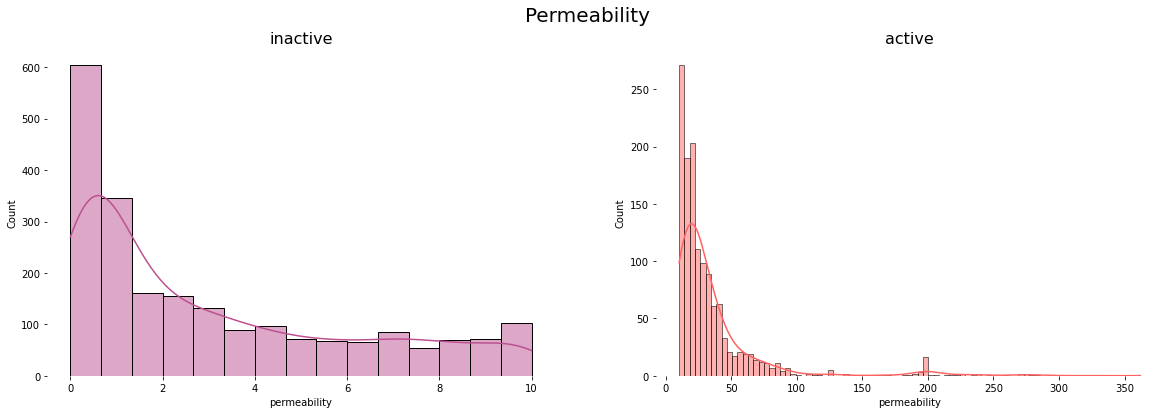

In [35]:
caco_1 = df_caco2[df_caco2['permeability']<=10]
caco_2 = df_caco2[df_caco2['permeability']>10]

fig, axes = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Permeability', fontsize=20)
left = sns.histplot(data=caco_1, x='permeability', ax = axes[0], kde=True, color=colors_palette[2])
right = sns.histplot(data=caco_2, x='permeability', ax = axes[1], kde=True, color=colors_palette[1])
axes[0].set_title('inactive', fontsize=16)
axes[1].set_title('active', fontsize=16)

sns.despine(left=True, bottom=True)

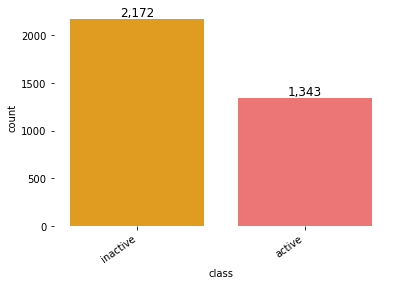

In [36]:
activity_th = []
for i in df_caco2.permeability:
    if float(i) <=10:
        activity_th.append("inactive")
    elif float(i) >10:
        activity_th.append("active")
        
activity_class = pd.Series(activity_th, name='class')
class_df = pd.concat([df_caco2, activity_class], axis=1)

a = sns.countplot(x='class', data=class_df, palette=colors_palette)

annotate(a)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

Text(0, 0.5, 'Permeability value')

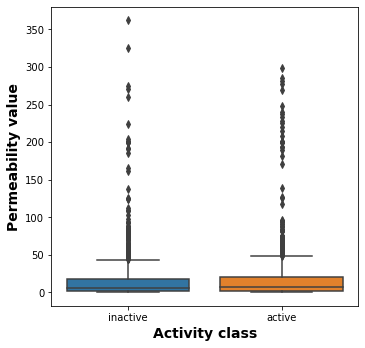

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'permeability', data = class_df)

plt.xlabel('Activity class', fontsize=14, fontweight='bold')
plt.ylabel('Permeability value', fontsize=14, fontweight='bold')

### 2.1.5 Prepare other fingerprints

In [128]:
to_drop_caco.sort(reverse=True)

In [24]:
df_caco_pubch_all.apply(pd.to_numeric, errors='coerce')
df_caco_pubch_all.drop(to_drop_caco, axis=0, inplace=True)
df_caco_pubch_all

permeability  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0             4.00           1           1           1           1   
1           200.00           1           1           0           0   
2             2.10           1           1           1           0   
3             2.60           1           1           1           1   
4             0.50           1           1           1           1   
...            ...         ...         ...         ...         ...   
3636          0.13           1           1           1           0   
3637          0.11           1           1           1           0   
3638          0.53           1           1           1           0   
3639          0.07           1           1           1           0   
3640          0.01           1           1           1           1   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
3636           0           0           0           0           0           1   
3637           0           0           0           0           0           1   
3638           0           0           0           0           0           1   
3639           0           0           0           0           0           1   
3640           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0               1            1            1            0            1   
1               1            1            0            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            1            1            1   
...           ...          ...          ...          ...          ...   
3636            1            1            1            0            1   
3637            1            1            1            0            1   
3638            1            1            1            0            1   
3639            1            1            1            0            1   
3640            1            1            1            0            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0               1            0            0            1            1   
1               1            1            0            0            0   
2               1            1            0            1            1   
3               1            1            0            1            1   
4               1            1            0            1            1   
...           ...          ...          ...          ...          ...   
3636            1            1            0            1            1   
3637            1            1            0            1            1   
3638            1            1            0            1            1   
3639            1            1            0            1            1   
3640            1            1            0            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0               0            0            0            0            0   
1               0            0            0            1            1   
2               1            0            0            1            1   
3               1            0            0            0            0   
4               0            0            0            0            0   
...         

In [25]:
df_caco_klek_all.apply(pd.to_numeric, errors='coerce')
df_caco_klek_all.drop(to_drop_caco, axis=0, inplace=True)
df_caco_klek_all

permeability  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  \
0             4.00      1      1      0      0      0      0      0      0   
1           200.00      1      0      0      0      0      0      0      0   
2             2.10      0      0      0      0      0      0      0      0   
3             2.60      1      0      0      0      0      0      0      0   
4             0.50      1      0      0      0      0      0      0      0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
3636          0.13      1      1      0      0      0      0      0      0   
3637          0.11      1      1      0      0      0      0      0      0   
3638          0.53      1      1      0      0      0      0      0      0   
3639          0.07      1      1      0      0      0      0      0      0   
3640          0.01      1      1      0      0      0      0      0      0   

      KRFP9  KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  KRFP17  \
0         0       0       0       0       0       0       0       1       0   
1         0       0       0       0       0       0       0       0       0   
2         0       0       0       0       0       0       0       0       0   
3         0       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
3636      0       0       0       0       0       0       0       1       0   
3637      0       0       0       0       0       0       0       1       0   
3638      0       0       0       0       0       0       0       1       0   
3639      0       0       0       0       0       0       0       1       0   
3640      0       0       0       0       0       0       0       1       0   

      KRFP18  KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  KRFP26  \
0          0       0       1       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3636       0       0       1       0       0       0       0       0       0   
3637       0       0       1       0       0       0       0       0       0   
3638       0       0       1       0       0       0       0       0       0   
3639       0       0       1       0       0       0       0       0       0   
3640       0       0       1       0       0       0       0       0       0   

      KRFP27  KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  KRFP35  \
0          0       0       0       0       0       0       1       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3636       0       0       0       0       0       0       0       0       0   
3637       0       0       0       0       0       0       0       0       0   
3638       0       0       0       0       0       0       0       0       0   
3639       0       0       0       0       0       0       0       0       0   
3640       0       0       0       0       0       0       0       0       0   

      KRFP36  KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  KRFP44  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0  

### 2.1.6 Save

In [96]:
df_caco2.to_csv('../data/processed/caco_maccs_all.csv', index=False)
df_caco_pubch_all.to_csv('../data/processed/caco_pubchem_all.csv', index=False)
df_caco_klek_all.to_csv('../data/processed/caco_klek_all.csv', index=False)

## 3. SDF file

Prepare SDF file with mols. 

### 3.1 Load data

In [129]:
suppl = Chem.SDMolSupplier('../data/raw/caco2_permeability_from_Chembl_permeability.sdf')
ms = [x for x in suppl if x is not None]
suppl2 = Chem.SDMolSupplier('../data/raw/caco2_permeability_from_Chembl_papp.sdf')
ms2 = [x for x in suppl2 if x is not None]
ms +=ms2
len(ms)

3641

### 3.2 Preprocess

Convert mols to smiles.

In [130]:
caco_smiles = [MolToSmiles(x,isomericSmiles=False) for x in ms ]
df_caco_smiles = pd.DataFrame(caco_smiles, columns=['smiles'])
df_caco_smiles

smiles
0     Cc1cccc(C)c1C(=O)N1CC2CN(CCC(NC(=O)C3CCCC3)c3c...
1                 Nc1ncnc2c1sc1nc(C3CC3)cc(C(F)(F)F)c12
2     CCc1nc(N)nc(N)c1-c1ccc2c(c1)N(CCNC(=O)OC)C(=O)...
3     CCOC(=O)N1CCC(CN(C2Cc3cc(C#N)ccc3N(Cc3cncn3C)C...
4     Cn1cncc1CN1CC(N(CC2CCN(C(=O)CC(C)(C)C)CC2)S(=O...
...                                                 ...
3636  Cc1oc(-c2ccccc2Cl)nc1C(=O)NC1CN(S(=O)(=O)c2ccc...
3637  CN(C(=O)C1CN(S(=O)(=O)c2ccccc2)CC1NC(=O)c1cc(-...
3638  O=C(NC1CN(S(=O)(=O)c2ccccc2)CC1C(=O)N1CC2CCNCC...
3639  O=C(NC1CN(S(=O)(=O)c2ccccc2)CC1C(=O)NC1CCCNC1)...
3640  Cc1ccc2[nH]c(C(=O)NC3CCN(S(=O)(=O)c4ccccc4Cl)C...

[3641 rows x 1 columns]

Drop.

In [131]:
len(to_drop_caco)

126

In [134]:
df_caco_smiles.drop(to_drop_caco, axis=0, inplace=True)
df_caco_smiles

smiles
0     Cc1cccc(C)c1C(=O)N1CC2CN(CCC(NC(=O)C3CCCC3)c3c...
1                 Nc1ncnc2c1sc1nc(C3CC3)cc(C(F)(F)F)c12
2     CCc1nc(N)nc(N)c1-c1ccc2c(c1)N(CCNC(=O)OC)C(=O)...
3     CCOC(=O)N1CCC(CN(C2Cc3cc(C#N)ccc3N(Cc3cncn3C)C...
4     Cn1cncc1CN1CC(N(CC2CCN(C(=O)CC(C)(C)C)CC2)S(=O...
...                                                 ...
3636  Cc1oc(-c2ccccc2Cl)nc1C(=O)NC1CN(S(=O)(=O)c2ccc...
3637  CN(C(=O)C1CN(S(=O)(=O)c2ccccc2)CC1NC(=O)c1cc(-...
3638  O=C(NC1CN(S(=O)(=O)c2ccccc2)CC1C(=O)N1CC2CCNCC...
3639  O=C(NC1CN(S(=O)(=O)c2ccccc2)CC1C(=O)NC1CCCNC1)...
3640  Cc1ccc2[nH]c(C(=O)NC3CCN(S(=O)(=O)c4ccccc4Cl)C...

[3515 rows x 1 columns]

Join.

In [135]:
df_caco_smiles = df_caco_smiles.join(df_caco2['permeability'])
df_caco_smiles

smiles  permeability
0     Cc1cccc(C)c1C(=O)N1CC2CN(CCC(NC(=O)C3CCCC3)c3c...          4.00
1                 Nc1ncnc2c1sc1nc(C3CC3)cc(C(F)(F)F)c12        200.00
2     CCc1nc(N)nc(N)c1-c1ccc2c(c1)N(CCNC(=O)OC)C(=O)...          2.10
3     CCOC(=O)N1CCC(CN(C2Cc3cc(C#N)ccc3N(Cc3cncn3C)C...          2.60
4     Cn1cncc1CN1CC(N(CC2CCN(C(=O)CC(C)(C)C)CC2)S(=O...          0.50
...                                                 ...           ...
3636  Cc1oc(-c2ccccc2Cl)nc1C(=O)NC1CN(S(=O)(=O)c2ccc...          0.13
3637  CN(C(=O)C1CN(S(=O)(=O)c2ccccc2)CC1NC(=O)c1cc(-...          0.11
3638  O=C(NC1CN(S(=O)(=O)c2ccccc2)CC1C(=O)N1CC2CCNCC...          0.53
3639  O=C(NC1CN(S(=O)(=O)c2ccccc2)CC1C(=O)NC1CCCNC1)...          0.07
3640  Cc1ccc2[nH]c(C(=O)NC3CCN(S(=O)(=O)c4ccccc4Cl)C...          0.01

[3515 rows x 2 columns]

In [136]:
df_caco_smiles['permeability'].isnull().values.any()

False

### 3.3 Save

In [137]:
df_caco_smiles.to_csv('../data/processed/caco_smiles_all.csv', index=False)